In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
df=pd.read_csv("tempdata/districts_cleaned.csv")
df.head()

,rownum,agency,state,state_abbr,agency_name,agency_id_nces,county,num_schools,num_charter_schools,num_pub_schools,city,zipcode,agency_type,district_level_code,location_type,cbsa_id,latitude,longitude,agency_id_state,charter_status,congressional_code,offered_g_lowest,offered_g_highest,students_ug,total_students,lep,ieps,lunch_free_eligible,lunch_reduced_eligible,lunch_total_free_and_reduced,students_pk_k,students_g1_g8,students_g9_g12,students_pk,students_k,students_g1,students_g2,students_g3,students_g4,students_g5,students_g6,students_g7,students_g8,students_g9,students_g10,students_g11,students_g12,students_ug.1,students_m,students_f,...,fall_membership,totalrev,tlocrev,tsrev,tfedrev,tcurelsc,tcurinst,tcurssvc,tcuroth,tcursalary,tcurbenefits,totalexp,tcapout,tnonelse,arra_rev,arra_exp,arra_capout,totalrev_pp,tlocrev_pp,tsrev_pp,tfedrev_pp,tcurinst_pp,tcurssv_pp,tcuroth_pp,tcursalary_pp,tcurbenefits_pp,totalexp_pp,tcapout_pp,tnonelse_pp,tcurelsc_pp,instexp_pp,tcurelsc_percent,tcurinst_percent,tcuroth_percent,tcurelsc_percent.1,tcurssvc_percent,tfedrev_percent,tlocrev_percent,tsrev_percent,bond_funds,other_funds,survyear,fipst,totd912,ebs912,drp912,totdpl,afgeb,afgr,totohc
0,1,21ST CENTURY CHARTER SCH OF GARY,Indiana,IN,21ST CENTURY CHARTER SCH OF GARY,1800046,MARION COUNTY,1,1,1,GARY,46402,7-Charter school agency,03-Elementary/secondary school system,13-City: Small,26900,39.771949,-86.155184,9545,1-All associated schools are charter schools,1807,Kindergarten,12th Grade,NaN,360,0,28,304,18,322,30,230,100,NaN,30,30,30,30,27,23,27,31,32,31,29,25,15,NaN,186,172,...,360,4000000,128000,2853000,1019000,3290000,1435000,1698000,157000,1488000,370000,4031000,715000,26000,178000,426000,171000,11111,356,7925,2831,3986,4717,436,4133,1028,11197,1986,72,9139,3986,11.2,43.6,4.8,45.2,51.6,25.5,3.2,71.3,0,174000,2009-10,18,-3,100,-3.0,13,43,30.2,-2
1,2,21ST CENTURY CYBER CS,Pennsylvania,PA,21ST CENTURY CYBER CS,4200091,CHESTER COUNTY,1,1,1,EXTON,19341,7-Charter school agency,03-Elementary/secondary school system,21-Suburb: Large,37980,40.005030,-75.678564,124150002,1-All associated schools are charter schools,4206,6th Grade,12th Grade,NaN,594,0,37,111,84,195,0,111,483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,32,60,114,122,138,109,NaN,231,355,...,594,6271000,6109000,162000,0,4816000,3032000,1784000,0,2494000,865000,5187000,329000,0,0,2000,0,10557,10285,273,0,5104,3003,0,4199,1456,8732,554,0,8108,5104,18.0,63.0,0.0,51.8,37.0,0.0,97.4,2.6,0,2132000,2009-10,42,33,483,6.8,102,77,100.0,-2
2,3,21ST CENTURY PREPARATORY SCHOOL AGENCY,Wisconsin,WI,21ST CENTURY PREPARATORY SCHOOL AGENCY,5500045,RACINE COUNTY,1,1,1,RACINE,53404,7-Charter school agency,01-Elementary school system only,13-City: Small,39540,42.729073,-87.797014,8110,1-All associated schools are charter schools,5501,Prekindergarten,8th Grade,NaN,507,35,45,255,35,290,111,396,0,59,52,53,56,51,47,57,45,46,41,NaN,NaN,NaN,NaN,NaN,231,276,...,507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-10,55,-2,-2,-2.0,-2,-2,-2.0,-2
3,5,A CENTER FOR CREATIVE EDUCATION,Arizona,AZ,CENTER FOR CREATIVE EDUCATION INC,400328,YAVAPAI COUNTY,2,2,2,COTTONWOOD,86326,7-Charter school agency,01-Elementary school system only,32-Town: Distant,39140,34.735242,-112.009497,79457,1-All associated schools are charter schools,401,Kindergarten,6th Grade,0,83,0,10,22,12,34,31,52,0,NaN,31,13,5,7,9,8,10,NaN,NaN,NaN,NaN,NaN,NaN,0,49,34,...,83,595000,42000,418000,135000,522000,287000,235000,0,265000,24000,541000,0,19000,0,123000,0,7169,506,5036,1627,3458,2831,0,3193,289,6518,0,229,6289,3458,4.6,55.0,0.0,50.8,45.0,22.7,7.1,70.3,0,0,2009-10,4,-2,-2,-2.0,-2,-2,-2.0,-2
4,6,A CHILD'S VIEW SCHOOL INC.,Arizona,AZ,A CHILD'S VIEW SCHOOL INC.,400431,PIMA COUNTY,1,1,1,TUCSON,85746,7-Charter school agency,01-Elementary school system only,21-Suburb: Large,46060,32.149179,-111.027203,87344,1-All associated schools are charter schools,407,Kin

In [50]:
df['aids_per_pupil']=df['total_aids']/df['total_students'].astype('float')
df['reduced_lunch_per_pupil']=df['lunch_total_free_and_reduced']/df['total_students'].astype('float')

In [51]:
pd.unique(df.columns)

array(['rownum', 'agency', 'state', 'state_abbr', 'agency_name',
       'agency_id_nces', 'county', 'num_schools', 'num_charter_schools',
       'num_pub_schools', 'city', 'zipcode', 'agency_type',
       'district_level_code', 'location_type', 'cbsa_id', 'latitude',
       'longitude', 'agency_id_state', 'charter_status',
       'congressional_code', 'offered_g_lowest', 'offered_g_highest',
       'students_ug', 'total_students', 'lep', 'ieps',
       'lunch_free_eligible', 'lunch_reduced_eligible',
       'lunch_total_free_and_reduced', 'students_pk_k', 'students_g1_g8',
       'students_g9_g12', 'students_pk', 'students_k', 'students_g1',
       'students_g2', 'students_g3', 'students_g4', 'students_g5',
       'students_g6', 'students_g7', 'students_g8', 'students_g9',
       'students_g10', 'students_g11', 'students_g12', 'students_ug.1',
       'students_m', 'students_f', 'students_an', 'students_a',
       'students_h', 'students_b', 'students_w', 'students_h.1',
       'student

In [45]:
#SURVYEAR     1        AN       School year
#FIPST        2        AN       Two Digit American National Standards Institute (ANSI) State Code.
#
#                             	01  =  Alabama        02  =  Alaska          04  =  Arizona
#                             	05  =  Arkansas       06  =  California      08  =  Colorado
#                             	09  =  Connecticut    10  =  Delaware        11  =  District of Columbia
#                             	12  =  Florida        13  =  Georgia         15  =  Hawaii
#                             	16  =  Idaho          17  =  Illinois        18  =  Indiana
#                             	19  =  Iowa           20  =  Kansas          21  =  Kentucky
#                             	22  =  Louisiana      23  =  Maine           24  =  Maryland
#                             	25  =  Massachusetts  26  =  Michigan        27  =  Minnesota
#                             	28  =  Mississippi    29  =  Missouri        30  =  Montana
#                             	31  =  Nebraska       32  =  Nevada          33  =  New Hampshire
#                             	34  =  New Jersey     35  =  New Mexico      36  =  New York
#                             	37  =  North Carolina 38  =  North Dakota    39  =  Ohio
#                             	40  =  Oklahoma       41  =  Oregon          42  =  Pennsylvania
#                             	44  =  Rhode Island   45  =  South Carolina  46  =  South Dakota
#                             	47  =  Tennessee      48  =  Texas           49  =  Utah
#                             	50  =  Vermont        51  =  Virginia        53  =  Washington
#                             	54  =  West Virginia  55  =  Wisconsin       56  =  Wyoming
#                             	58  =  DOD Dependents Schools-Overseas    
#                             	59  =  Bureau of Indian Education
#                             	60  =  American Samoa 61  =  DOD Dependents School-Domestic
#                             	66  =  Guam           69  =  Northern Marianas
#                             	72  =  Puerto Rico    78  =  Virgin Islands
#
#LEAID        3        AN       NCES Assigned Local Education Agency Identification Number
#TOTD912      4        N        Total Dropouts, Grades 9–12
#EBS912       5        N        Dropout Enrollment Base, Grades 9–12
#DRP912       6*       N        Dropout Rate, Grades 9–12
#TOTDPL       7        N        Total Diploma Count
#AFGEB        8        N        Total Averaged Freshman Graduation Rate (AFGR) Enrollment Base
#AFGR         9*       N        Total Averaged Freshmen Graduation Rate (AFGR)
#TOTOHC      10        N        Total Other High School Completion Certificate (OHC) Recipients


In [46]:
#Resp columns are drp912 [dropouts] and afgr [graduations]

In [47]:
# Function takes DataFrame as input and returns
# 1. DF with column_name, unique values in a column, length of unique values, perc of NaN in column values
# 2. Invalid Columns (with more than 85% NaNs)]
# 3. Indicator Columns
def df_desc(in_DF):
    col_dicts = []
    INVALID_COLS = []
    INDICATOR_COLS = []
    for col in in_DF.columns:
        col_dict={}
        uniq_vals=in_DF[col].unique()
        l_uniq = len(uniq_vals)
        l_NaN = len(in_DF[pd.isnull(df[col])])
        l_DF = len(in_DF)
        NaN_perc = l_NaN/99074.0
        col_dict['col_name']=col
        col_dict['col_uniqval_cnt']=l_uniq
        col_dict['col_NaN_perc'] = NaN_perc
        col_dict['uniq_vals'] = uniq_vals
        col_dicts.append(col_dict)
        if NaN_perc < .85: 
            if l_uniq <= 10: # Adding columns with few unique values to Indicators columns list
                INDICATOR_COLS.append(col)
        else:    # Adding columns with high NaN % to invalid columns list
            INVALID_COLS.append(col)
    df_col_uv = pd.DataFrame(col_dicts).sort(['col_uniqval_cnt','col_NaN_perc'], ascending=[True, False]) #DF to store column unique value counts
    return df_col_uv, INVALID_COLS,INDICATOR_COLS

In [48]:
INVALID_COLUMNS=[]
INDICATOR_COLUMNS = []
df_col_uv, INVALID_COLUMNS, INDICATOR_COLUMNS = df_desc(df)

In [49]:
for index, row in df_col_uv.iterrows():
    if row['col_name'] not in INVALID_COLUMNS:
        print '-------------------------------------------------------------------------------------------------'
        print row['col_name'], row['col_NaN_perc'], row['col_uniqval_cnt']#, row['uniq_vals']
        print df[row['col_name']].value_counts(dropna=False)

-------------------------------------------------------------------------------------------------
survyear 0.0 1
2009-10    10903
dtype: int64
-------------------------------------------------------------------------------------------------
charter_status 2.01869309809e-05 4
3-All associated schools are noncharter                9937
2-All associated schools are charter and noncharter     613
1-All associated schools are charter schools            351
NaN                                                       2
dtype: int64
-------------------------------------------------------------------------------------------------
offered_g_highest 0.0 4
12th Grade    10893
8th Grade         8
11th Grade        1
5th Grade         1
dtype: int64
-------------------------------------------------------------------------------------------------
ged_h_f 0.100773159457 5
NaN    9984
 0      904
 1       13
 4        1
 2        1
dtype: int64
------------------------------------------------------------

In [82]:
# Identified list of columns that are amenable for standardization. 
#NOTE FROM BRENDAN - I ADDED A FEW TEST FIELDS FOR ANALYSIS - MANY MORE NEEDED
STANDARDIZABLE = ['pupil_teacher_ratio','totalexp_pp','reduced_lunch_per_pupil']

In [83]:
print INVALID_COLUMNS
print '---------------------------------------------------------------------------------------------'
print INDICATOR_COLUMNS
print '---------------------------------------------------------------------------------------------'
print STANDARDIZABLE

[]
---------------------------------------------------------------------------------------------
['agency_type', 'district_level_code', 'charter_status', 'offered_g_highest', 'pk_h_m.1', 'pk_h_f.1', 'ged_h_m', 'ged_h_f', 'gug_mr_f', 'survyear']
---------------------------------------------------------------------------------------------
['pupil_teacher_ratio', 'totalexp_pp', 'reduced_lunch_per_pupil']


In [84]:
###NOTE FROM BRENDA - Filtering on the dataframe where graduation data does not equal '-2' which indicates no data. (Is this correct?)
df=df[df['afgr']>0]
df.shape

(10903, 344)

In [85]:
from sklearn.cross_validation import train_test_split
itrain, itest = train_test_split(xrange(df.shape[0]), train_size=0.7)

In [86]:
mask=np.ones(df.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [87]:
mask

array([ True,  True, False, ...,  True,  True,  True], dtype=bool)

In [88]:
mask.shape, mask.sum()

((10903L,), 7632)

In [89]:
####Replace NAs with 0
df=df.fillna(0)

In [90]:
from sklearn.preprocessing import StandardScaler

trainDS = df[mask]
testDS = df[~mask]

scaler = StandardScaler().fit(trainDS[STANDARDIZABLE])
scalerTwo = StandardScaler().fit(testDS[STANDARDIZABLE])

df.ix[mask, STANDARDIZABLE] = scaler.transform(trainDS[STANDARDIZABLE])
df.ix[~mask, STANDARDIZABLE] = scalerTwo.transform(testDS[STANDARDIZABLE])

In [91]:
lcols=list(df.columns)
lcols.remove('drp912') #dropouts
lcols.remove('afgr') #graduations
print len(lcols)

342


In [92]:
ccols=[]
for c in lcols:
    if c not in INDICATOR_COLUMNS:
        ccols.append(c)
print len(ccols), len(INDICATOR_COLUMNS)
ccols

332 10


['rownum',
 'agency',
 'state',
 'state_abbr',
 'agency_name',
 'agency_id_nces',
 'county',
 'num_schools',
 'num_charter_schools',
 'num_pub_schools',
 'city',
 'zipcode',
 'location_type',
 'cbsa_id',
 'latitude',
 'longitude',
 'agency_id_state',
 'congressional_code',
 'offered_g_lowest',
 'students_ug',
 'total_students',
 'lep',
 'ieps',
 'lunch_free_eligible',
 'lunch_reduced_eligible',
 'lunch_total_free_and_reduced',
 'students_pk_k',
 'students_g1_g8',
 'students_g9_g12',
 'students_pk',
 'students_k',
 'students_g1',
 'students_g2',
 'students_g3',
 'students_g4',
 'students_g5',
 'students_g6',
 'students_g7',
 'students_g8',
 'students_g9',
 'students_g10',
 'students_g11',
 'students_g12',
 'students_ug.1',
 'students_m',
 'students_f',
 'students_an',
 'students_a',
 'students_h',
 'students_b',
 'students_w',
 'students_h.1',
 'students_mr',
 'total_race',
 'pk_an_m',
 'pk_an_f',
 'pk_a_m',
 'pk_a_f',
 'pk_h_m',
 'pk_h_f',
 'pk_b_m',
 'pk_b_f',
 'pk_w_m',
 'pk_w_f',
 '

In [93]:
df.describe()

,rownum,agency_id_nces,num_schools,num_charter_schools,num_pub_schools,zipcode,cbsa_id,latitude,longitude,congressional_code,students_ug,total_students,lep,ieps,lunch_free_eligible,lunch_reduced_eligible,lunch_total_free_and_reduced,students_pk_k,students_g1_g8,students_g9_g12,students_pk,students_k,students_g1,students_g2,students_g3,students_g4,students_g5,students_g6,students_g7,students_g8,students_g9,students_g10,students_g11,students_g12,students_ug.1,students_m,students_f,students_an,students_a,students_h,students_b,students_w,students_h.1,students_mr,total_race,pk_an_m,pk_an_f,pk_a_m,pk_a_f,pk_h_m,...,totalrev,tlocrev,tsrev,tfedrev,tcurelsc,tcurinst,tcurssvc,tcuroth,tcursalary,tcurbenefits,totalexp,tcapout,tnonelse,arra_rev,arra_exp,arra_capout,totalrev_pp,tlocrev_pp,tsrev_pp,tfedrev_pp,tcurinst_pp,tcurssv_pp,tcuroth_pp,tcursalary_pp,tcurbenefits_pp,totalexp_pp,tcapout_pp,tnonelse_pp,tcurelsc_pp,instexp_pp,tcurelsc_percent,tcurinst_percent,tcuroth_percent,tcurelsc_percent.1,tcurssvc_percent,tfedrev_percent,tlocrev_percent,tsrev_percent,bond_funds,other_funds,fipst,totd912,ebs912,drp912,totdpl,afgeb,afgr,totohc,aids_per_pupil,reduced_lunch_per_pupil
count,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,...,1.090300e+04,1.090300e+04,1.090300e+04,1.090300e+04,1.090300e+04,1.090300e+04,1.090300e+04,1.090300e+04,1.090300e+04,1.090300e+04,1.090300e+04,1.090300e+04,1.090300e+04,1.090300e+04,1.090300e+04,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,1.090300e+04,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,1.090300e+04,1.090300e+04,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,1.090300e+04
mean,9637.109328,3144851.281666,7.923691,0.240759,7.999450,52690.816839,21900.634688,39.347466,-91.605206,3138.438320,14.990003,4089.238008,372.749610,532.643126,1552.461800,309.630560,1862.092360,395.667248,2435.370082,1245.707420,91.982207,303.574888,307.829313,302.654590,306.446666,305.688710,301.470880,300.250206,304.017243,305.000550,341.887462,318.359901,295.913693,285.010731,14.701183,2077.537100,1964.553334,47.660369,194.439971,867.088599,692.593782,2215.120792,3.567550,25.442722,4045.913785,0.738512,0.636155,1.655324,1.391819,13.622856,...,4.766987e+07,2.108180e+07,2.073390e+07,5.854169e+06,4.048948e+07,2.460884e+07,1.419813e+07,1.682509e+06,2.491096e+07,8.450501e+06,4.848962e+07,4.781597e+06,4.949052e+05,3.126615e+05,1.995475e+06,97937.356691,12885.844997,5418.499679,5900.063652,1567.279373,6519.600936,3861.232138,465.419884,6412.832798,2209.056040,5.822994e-17,1279.740438,122.940017,10846.258369,6519.600936,19.766321,59.765468,4.506860,58.677016,34.636715,12.269577,39.653866,46.985701,4.102692e+06,8.136969e+06,31.316518,31.924700,1255.206182,-1.024223,264.400349,337.022471,82.694845,3.414565,0.017472,-8.431300e-17
std,5526.676814,1440336.740549,19.201594,2.297395,19.424139,26689.579748,16589.741426,4.819493,13.573442,1441.740382,171.095304,13309.057543,2804.689256,1656.495403,7412.842623,1016.923938,8332.037373,1345.330079,8043.551356,3975.688628,414.590833,1040.286261,1038.447295,1021.023645,1038.403558,1018.010679,1000.282207,980.297974,985.779013,976.429078,1169.237438,1053.60

In [96]:
#We need to turn drp912 and afgr into response columns.

############NOTE FROM BRENDAN - ONLY 2255 DISTRICTS HAVE drp912 DATA

#A suggestion of how to do this is to end up creating 4 columns.  We want the top quartile
#(the best school districts), and the bottom quartile (the worst school districts).  Best and worst are reversed
#quartile-wise when we're discussing dropout.

afgrquantile = df['afgr'].quantile(.5)
print afgrquantile

84.5


In [103]:
#######NOTE FROM BRENDAN -  ADDED A 1 or 0 IF THE DISTRICT WAS IN THE TOP OR BOTTOM QUARTILE
df['afgr_i']=0
df['afgr_i'][df['afgr']>=afgrquantile]=1
df['afgr_i'].sum()

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


5466L

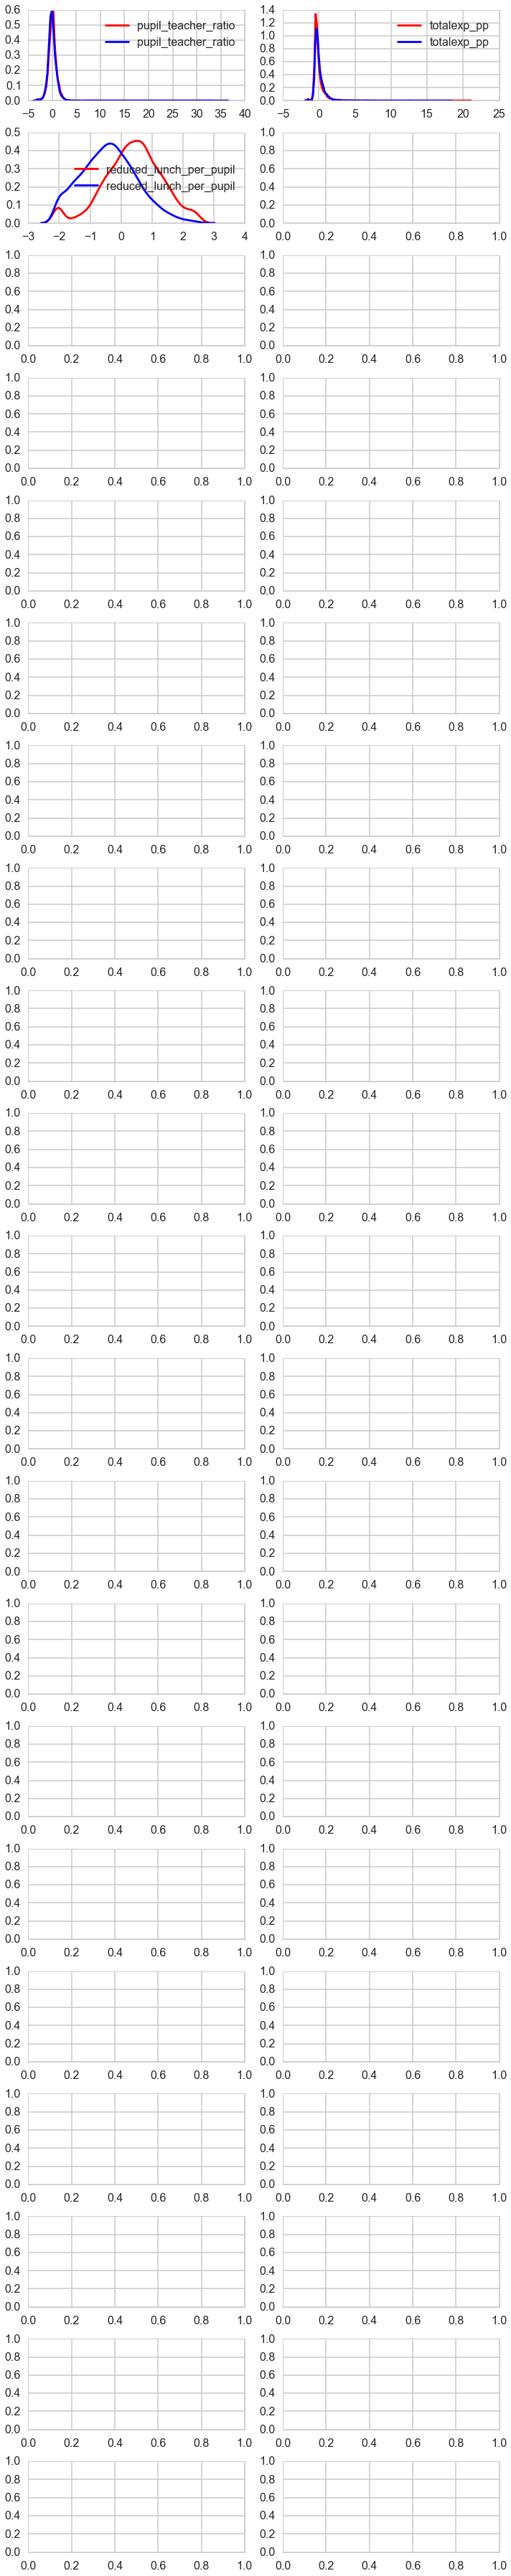

In [104]:
#Modify this code to replace with the resp columns we end up creating

######NOTE FROM BRENDAN - I USED THE THREE STANDARDIZABLE FIELDS TO START

fig, axs = plt.subplots(21, 2, figsize=(10,50), tight_layout=True)

for item, ax in zip(df[STANDARDIZABLE], axs.flat):
    sns.kdeplot(df[df["afgr_i"]==0][item], ax=ax, color='r')
    sns.kdeplot(df[df["afgr_i"]==1][item], ax=ax, color='b')

In [ ]:
#The questions we end up predicting are:
#will a school district be in the top quartile for graduation?
#will a school distict be in the bottom quartile for graduation?
#will a school distict be in the bottom quartile for dropouts?
#will a school district be in the top quartile for dropouts?

#This means 4 different models.  Essentially, start going through HW3 starting at 1.4
#and follow all of the steps 4 times for the 4 different models.

from sklearn.svm import LinearSVC
